Завдання №5
Прикладна аналітика при розробці IT

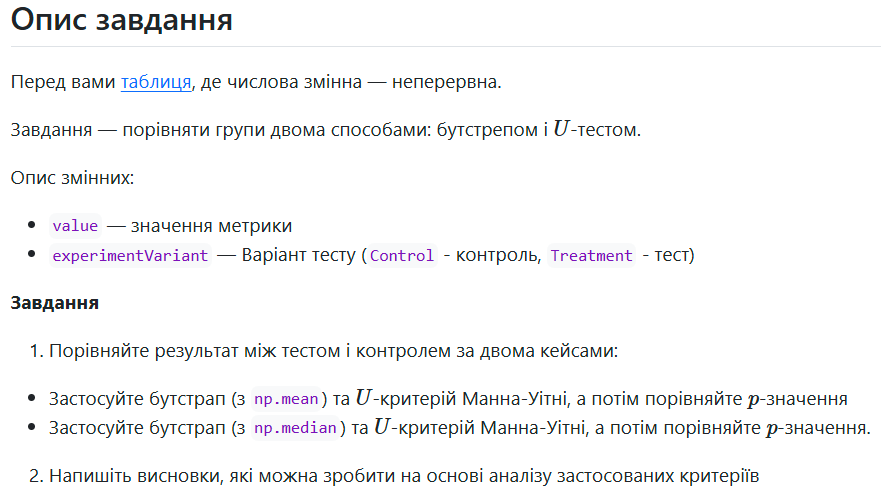

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu

# завантажуємо дані
url = "https://raw.githubusercontent.com/Aranaur/aranaur.rbind.io/main/datasets/bootstrap/bootstrap.csv"
data = pd.read_csv(url, delimiter=";", quotechar='"')

data.columns = [col.strip() for col in data.columns]  # видаляємо зайві символи (пробіли та заміна ком на крапки)
data['value'] = data['value'].str.replace(',', '.').astype(float)  

print("Назви стовпців:", data.columns.tolist()) 

control = data[data['experimentVariant'] == 'Control']['value'] # розділяємо дані на контрольну та тестову групи
treatment = data[data['experimentVariant'] == 'Treatment']['value']

Назви стовпців: ['Unnamed: 0', 'value', 'experimentVariant']


Кейс 1: Бутстреп із середнім значенням та тест Манна-Уітні
(Бутстреп із середнім значенням)

In [2]:
# Кейс 1: Бутстреп із середнім значенням
np.random.seed(42)
control_bootstrap_means = [np.mean(np.random.choice(control, size=len(control), replace=True)) for _ in range(1000)]
treatment_bootstrap_means = [np.mean(np.random.choice(treatment, size=len(treatment), replace=True)) for _ in range(1000)]

bootstrap_p_value_mean = np.mean([t > c for t, c in zip(treatment_bootstrap_means, control_bootstrap_means)])
print("P-value для бутстрепу (mean):", bootstrap_p_value_mean)
print("---------------------------")
stat_mean, p_value_mean = mannwhitneyu(control, treatment, alternative='two-sided')
print("Манна-Уітні p-value (mean):", p_value_mean)

P-value для бутстрепу (mean): 0.994
---------------------------
Манна-Уітні p-value (mean): 0.8592148582485579


Кейс 2: Бутстреп із медіаною та тест Манна-Уітні (Бутстреп із медіаною)

In [3]:
# Кейс 2: Бутстреп із медіаною
control_bootstrap_medians = [np.median(np.random.choice(control, size=len(control), replace=True)) for _ in range(1000)]
treatment_bootstrap_medians = [np.median(np.random.choice(treatment, size=len(treatment), replace=True)) for _ in range(1000)]

bootstrap_p_value_median = np.mean([t > c for t, c in zip(treatment_bootstrap_medians, control_bootstrap_medians)])
print("P-value для бутстрепу (median):", bootstrap_p_value_median)
print("---------------------------")
stat_median, p_value_median = mannwhitneyu(control, treatment, alternative='two-sided')
print("Манна-Уітні p-value (median):", p_value_median)

P-value для бутстрепу (median): 0.536
---------------------------
Манна-Уітні p-value (median): 0.8592148582485579


Висновок: на основі отриманих результатів можемо стверджувати, що P-value для бутстрепу із середнім значенням 0.994 і P-value для тесту Манна-Уітні із середнім значенням 0.859 обидва значно перевищують стандартний рівень значущості. Отже різниця між середніми значеннями метрики в контрольній і тестовій групах не є статистично значущою. Також слід згадати, що P-value для бутстрепу із медіаною 0.536 і P-value для тесту Манна-Уітні із медіаною 0.859 також перевищують стандартний рівень значущості.

Отже, обидва застосовані підходи для оцінки середнього і медіанного значень метрики показують відсутність статистично значущих відмінностей між контрольним і тестовим варіантами. Це означає, що немає підстав вважати, що тестовий варіант суттєво відрізняється від контрольного, отже, зміна не має статистично значущого ефекту на метрику, яку ми досліджували.